In [7]:
from math import sqrt
import matplotlib.pyplot as plt


In [29]:
cap1=1000 #теплоемкость тела
cap2=500
rho1=10**3 #плотность тела
rho2=8*10**3
k1=0.1 #коэффициент теплопроводности
sigma=5.67e-8 #константа Стефана-Больцмана

k2=10
q0=10**7
t=10**6
a0=0.001
b0=0.0005
N=100
h=(a0-0)/N
print('h =',h)
dt=10
Nt=int(t/dt)
eps=10e-10
Tc=293


h = 1e-05


In [30]:

def T0(r):
    return 310.75 if r<=b0 else 100
def cap(r):
    return cap1 if r<=b0 else cap2
def rho(r):
    return rho1 if r<=b0 else rho2
def k(r):
    return k1 if r<=b0 else k2
def q(r):
    return q0 if r<=b0 else 0


T(0) = 310.99750000155524 T(a) = 298.0000000015202
311.00250000155523 298.0050000015217
311.00250000155523 297.9975000015194
T(b) = 308.00250000155614
Tmax = 311.00250000155523 Tmin = 297.9975000015194


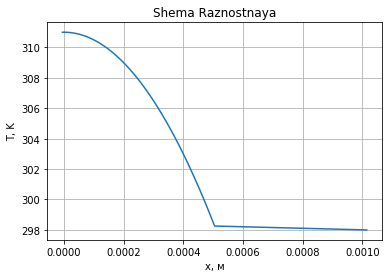

In [34]:
def razn():
    r = [(i - 1) * h / 2 for i in range(2 * N + 5)]
    r_new=r[::2]
    
    temp=[10 for i in range(len(r_new))]
    for j in range(len(temp)):
        temp[j] = T0(r_new[j])  

    temp_new = [10 for i in range(len(r_new))]
    f = [0 for i in range(len(temp))]
    a = [0 for i in range(len(f))]
    c = [0 for i in range(len(f))]
    b = [0 for i in range(len(f))]
    f1 = [0 for i in range(len(temp))]
    a1 = [0 for i in range(len(f))]
    c1 = [0 for i in range(len(f))]
    b1 = [0 for i in range(len(f))]

    l = len(f)
    alpha = [0 for i in range(l)]
    beta = [0 for i in range(l)]

    for m in range(Nt*2):
        for i in range(len(temp)):
            temp[i] = temp_new[i]
        for i in range(len(temp)):
            if i==0:
                f[i]=0; a[i]=0; c[i]=1; b[i]=-1
            elif i==len(temp)-1:
                f[i]=293000
                a[i]=-999500; c[i]=1000500; b[i]=0
            else:
              
                f[i] = q(r_new[i])- temp[i] * (-cap(r_new[i]) * rho(r_new[i])) / dt
                a[i]=-k(r_new[i]-0.5*h) / h ** 2
                c[i]=cap(r_new[i]) * rho(r_new[i]) / dt + (k(r_new[i]+0.5*h) + k(r_new[i]-0.5*h))/h**2
                b[i]=-k(r_new[i]+0.5*h) / h ** 2

        c1[0]=c[0]
        f1[0] = f[0]
        for i in range(1,l):
            c1[i]=c[i]-a[i]*b[i-1]/c1[i-1]
            f1[i]=f[i]-a[i]*f1[i-1]/c1[i-1]
        temp_new[l - 1] = f1[l - 1] / c1[l - 1]
        for i in reversed(range(l-1)):
            temp_new[i]=(f1[i]-b[i]*temp_new[i+1])/c1[i]

    print('T(0) =',0.5*(temp_new[1]+temp_new[2]),'T(a) =',0.5*(temp_new[N+2]+temp_new[N+1]))
    print(0.5 * (temp_new[1] + temp_new[0]), 0.5 * (temp_new[N ] + temp_new[N + 1]))
    print(temp_new[0],temp_new[N+2])
    print('T(b) =',temp_new[int(N/4)])
    print('Tmax =', max(temp_new), 'Tmin =', min(temp_new))
    
    plt.title('Shema Raznostnaya')
    plt.grid(True)
    plt.xlabel(u'x, м')
    plt.ylabel(u'T, K')

    plt.plot(r_new,temp_new, label='Temperature')
    plt.show()

razn()

T(0) = 310.9975000004649 T(a) = 298.0000000507224
311.00250000046555 298.0050000068711
311.00250000046555 297.99750005069706
T(b) = 298.7524999976982
Tmax = 311.00250000046555 Tmin = 297.99750005069706


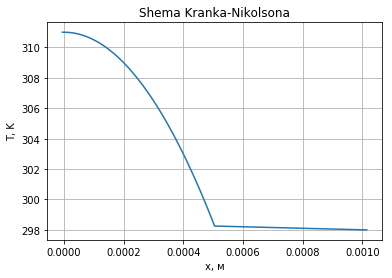

In [32]:
def KN():
    r = [(i - 1) * h / 2 for i in range(2 * N + 5)]
    r_new=r[::2]
    
    temp=[10 for i in range(len(r_new))]
    for j in range(len(temp)):
        temp[j] = T0(r_new[j])  

    temp_new = [10 for i in range(len(r_new))]
    f = [0 for i in range(len(temp))]
    a = [0 for i in range(len(f))]
    c = [0 for i in range(len(f))]
    b = [0 for i in range(len(f))]
    f1 = [0 for i in range(len(temp))]
    a1 = [0 for i in range(len(f))]
    c1 = [0 for i in range(len(f))]
    b1 = [0 for i in range(len(f))]

    l = len(f)
    alpha = [0 for i in range(l)]
    beta = [0 for i in range(l)]

    for m in range(Nt*2):
        for i in range(len(temp)):
            temp[i] = temp_new[i]
        for i in range(len(temp)):
            if i==0:
                f[i]=0; a[i]=0; c[i]=1; b[i]=-1
            elif i==len(temp)-1:
                f[i]=293000
                a[i]=-999500; c[i]=1000500; b[i]=0
            else:
              
                f[i] = q(r_new[i])  + temp[i + 1] * 0.5 * k(r_new[i]+0.5*h) / h ** 2 - temp[i] * (-cap(r_new[i]) * rho(r_new[i]) / dt + 0.5 / h ** 2 * (k(r_new[i]+0.5*h) +  k(r_new[i]-0.5*h))) + temp[i - 1] * 0.5 * k(r_new[i]-0.5*h) / h ** 2
                a[i]=-0.5 * k(r_new[i]-0.5*h) / h ** 2
                c[i]=cap(r_new[i]) * rho(r_new[i]) / dt + 0.5  / h ** 2 * (k(r_new[i]+0.5*h) + k(r_new[i]-0.5*h))
                b[i]=-0.5 * k(r_new[i]+0.5*h) / h ** 2

        c1[0]=c[0]
        f1[0] = f[0]
        for i in range(1,l):
            c1[i]=c[i]-a[i]*b[i-1]/c1[i-1]
            f1[i]=f[i]-a[i]*f1[i-1]/c1[i-1]
        temp_new[l - 1] = f1[l - 1] / c1[l - 1]
        for i in reversed(range(l-1)):
            temp_new[i]=(f1[i]-b[i]*temp_new[i+1])/c1[i]

    print('T(0) =',0.5*(temp_new[1]+temp_new[2]),'T(a) =',0.5*(temp_new[N+2]+temp_new[N+1]))
    print(0.5 * (temp_new[1] + temp_new[0]), 0.5 * (temp_new[N ] + temp_new[N + 1]))
    print(temp_new[0],temp_new[N+2])
    print('T(b) =',temp_new[int(N/2)])
    print('Tmax =', max(temp_new), 'Tmin =', min(temp_new))
    
    plt.title('Shema Kranka-Nikolsona')
    plt.grid(True)
    plt.xlabel(u'x, м')
    plt.ylabel(u'T, K')

    plt.plot(r_new,temp_new, label='Temperature')
    plt.show()

KN()

T(0) = 310.74375 T(a) = 297.995
310.74875 298.0
310.74875 297.9925
T(b) = 298.49875
Tmax = 310.74875 Tmin = 297.9925


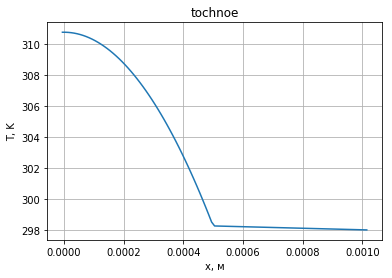

In [33]:
def tochnoe():
    r = [(i - 1) * h / 2 for i in range(2*N + 5)]
    r_new=r[::2]
    temp_new =[299.375 for i in range(len(r_new))]
    for i in range(len(r_new)):
        if i<=N/2:
            temp_new[i]=310.75-0.5*10**8*r_new[i]**2
        else:
            temp_new[i]=298.5-500*r_new[i]


    print('T(0) =',0.5*(temp_new[1]+temp_new[2]),'T(a) =',0.5*(temp_new[N+2]+temp_new[N+1]))
    print(0.5 * (temp_new[1] + temp_new[0]), 0.5 * (temp_new[N ] + temp_new[N + 1]))
    print(temp_new[0],temp_new[N+2])
    print('T(b) =',temp_new[int(N/2)])
    print('Tmax =', max(temp_new), 'Tmin =', min(temp_new))
    
    plt.title('tochnoe')
    plt.grid(True)
    plt.xlabel(u'x, м')
    plt.ylabel(u'T, K')

    plt.plot(r_new,temp_new, label='Temperature')
    plt.show()

tochnoe()